# Python Notebook Demonstrating Red Channel (a-SMA) Processing

Here, we detail an example of using our developed modules to process in batch our red channel images.
We begin by importing a number of packages that are required. Namely, we need to import the standard functions, such as NumPy, Pandas, Matplotlib. Additionally, we need to import modules from our cells_in_gel package and some skimage functions to ensure that our functions work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from skimage import io
from skimage.measure import regionprops, regionprops_table
from skimage.morphology import disk

from cells_in_gel import preprocess as pp
from cells_in_gel import properties as props
from cells_in_gel import batch

We next create a list of our images using the preprocessing function `list_of_images` and create a dict of max projections using the batch function `max_projection` as we would like to keep our image titles as keys associated with their respective images.

In [2]:
path = '/Users/irinakopyeva/documents/Channel_Separated' #change with pathname.
files = pp.list_of_images('C4', path)

In [3]:
max_proj = batch.max_projection(files)

Next, we utilize the preprocessing function `SMA_segment` to segment and create labels of our red channel, a functional similar to `phalloidin_segment` but with specific presets for the red channel. These labels can be then used as inputs to the properties function `im_properties` to create a regionprops table. 

In [5]:
labels = {}
overlay = {}
regions = {}
   
for file in files:
    labels[file], overlay[file] = pp.SMA_segment(max_proj[file])

for file in files:   
    regions[file] = props.im_properties(labels[file], max_proj[file])

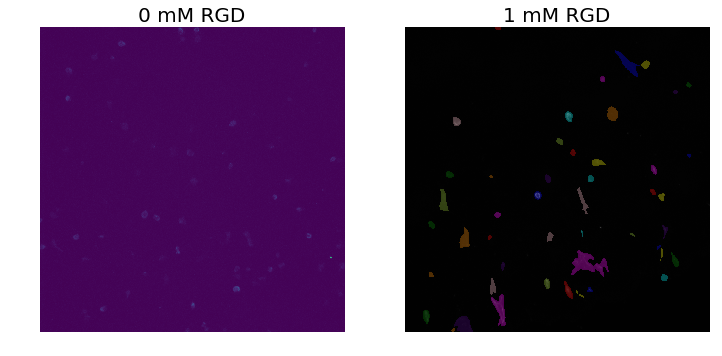

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

axes[0].imshow(max_proj[files[3]])
axes[0].set_title('0 mM RGD', fontsize='20')

axes[1].imshow(overlay[files[2]])
axes[1].set_title('1 mM RGD', fontsize='20')

for ax in axes:
    ax.axis('off')
    
#plt.imshow(overlay[files[1]], cmap = 'gray')

Let's print the regions table to make sure we've gotten what we want. Here, we can see that our code has segemented each "SMA" blob into its own blob and has taken values specified by the function. Here, we are mainly interested in mean_intensity, so we will disregard the other values as we progress.

In [12]:
print(regions[files[0]].head())

   area  major_axis_length  minor_axis_length  mean_intensity  eccentricity  \
0  2464          65.958327          50.623514     3639.816558      0.641040   
1   185          18.204946          13.010069     1603.832432      0.699488   
2   112          14.031598          10.388166     2129.830357      0.672232   
3   508          26.810361          24.216816     4782.826772      0.429087   
4   907          60.774514          21.781940     1587.832415      0.933566   

     extent                                             coords  centroid-0  \
0  0.626494  [[2, 442], [2, 443], [2, 444], [2, 445], [2, 4...          30   
1  0.734127  [[54, 554], [54, 555], [54, 556], [54, 557], [...          60   
2  0.783217  [[54, 1019], [54, 1020], [54, 1021], [54, 1022...          60   
3  0.752593  [[131, 471], [131, 472], [131, 473], [131, 474...         143   
4  0.539239  [[145, 879], [145, 880], [145, 881], [145, 882...         159   

   centroid-1  
0         434  
1         556  
2       

We then proceed to calculate the average mean intensity and standard deviations for each max projection, again making new dicts to ensure that we still have the image titles as the keys.

In [13]:
avg_props = {}
var_props = {}

for file in files:
    avg_props[file] = np.mean(regions[file]['area'])
    var_props[file] = np.std(regions[file]['area'])

We can see that our function worked, and that calling on the first image of the dictionary, we see that image has an average intensity value of 2418.62.

In [14]:
print(avg_props[files[0]])

843.2647058823529


Next, we call upon our `mergeDict` function from the batch file to merge the two dictionaries to make a summary dict which is then converted to an array called summary. But we have an issue! The image titles are now column titles, which is not what we desire.

In [15]:
summary = pd.DataFrame.from_dict(batch.mergeDict(var_props, avg_props))
summary.head()

,/Users/irinakopyeva/documents/Channel_Separated/C4-NTG-CFbs_I61Q5ECM_1mMRGD_20x_002.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-NTG-CFbs_I61Q1ECM_0mMRGD_20x_002.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-NTG-CFbs_I61Q5ECM_1mMRGD_20x_001.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-I61QTTA-CFbs_NTG5ECM_0mMRGD_20x_001.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-I61QTTA-CFbs_NoECM_0mMRGD_20x_003.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-I61QTTA-CFbs_NTG5ECM_0mMRGD_20x_002.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-I61QTTA-CFbs_I61Q1ECM_1mMRGD_20x_002.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-I61QTTA-CFbs_I61Q1ECM_1mMRGD_20x_003.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-NTG-CFbs_NTG1ECM_0mMRGD_20x_002.tif,/Users/irinakopyeva/documents/Channel_Separated/C4-NTG-CFbs_NTG5ECM_0mMRGD_20x_002.tif
0,843.264706,899.926829,719.12766,286.860000,343.023529,285.646018,732.418182,512.109091,454.434783,425.372093
1,1230.682506,694.757245,883.19099,151.013246,186.860563,155.742692,638.014924,352.100330,255.661431,363.536251


So we transpose our array, and label the columns, and while we're at it also change the name of the index.

In [16]:
summary = summary.transpose()
summary.columns = ['Activation (pixels)', 'Standard Deviation']

In [17]:
summary.index.name = 'type of cells'

In [18]:
summary = summary.reset_index()
summary.head()

,type of cells,Activation (pixels),Standard Deviation
0,/Users/irinakopyeva/documents/Channel_Separate...,843.264706,1230.682506
1,/Users/irinakopyeva/documents/Channel_Separate...,899.926829,694.757245
2,/Users/irinakopyeva/documents/Channel_Separate...,719.127660,883.190990
3,/Users/irinakopyeva/documents/Channel_Separate...,286.860000,151.013246
4,/Users/irinakopyeva/documents/Channel_Separate...,343.023529,186.860563


Now we have all of our information, yet our cell names are not great. We need to extract the information from the files such as Fibroblast and ECM genotype, Concentrations of ECM and RGD. To do this, we import the `re` package from python to split the strings located in the column "*type of cells*". This part is a bit complex, and highly depends on how you choose to label your files. Ideally if I were to do this, I would label all my tif files as such:

Channel#_FibroblastGenotype_ECMGenotype_ECMConcentration_RGDConcentration_Magnification_SampleNumber.

i.e. a file would be named as such: **C4_I61QTTA-CFbs_NTG_5_1mM_20x_002.tif** and we would break it at every '_'.

***However, our labmate had a bit of a weirder filing system, so hence there is a lot of splitting of strings***. His are labelled as such: **C4-I61QTTA-CFbs_NTG5ECM_1mMRGD_20x_002.tif**, which is fine for looking at files, but not so much for a consistent pattern of delimiters.

In [22]:
import re

In [23]:
copymod = summary.copy()
copymod['Fibroblast Genotype'] = "d"
copymod['ECM Genotype'] = "d"
copymod['ECM Concentration mg/mL'] = "d"
copymod['RGD Concentration mM'] ="d"

"""HIGHLY DEPENDENT ON HOW YOU LABEL YOUR FILES AND WHAT MICE YOU ARE USING.
    We need to break apart file name to label the columns properly so we can sort later.
    File name structure in this case: C4-FibroblastGenotype_ECMGenotypeAndConcentration_RGDConcentration
    deletes the rest of the path name."""

for i, row in enumerate(summary['type of cells']):
    mod = re.split('C4-|_20x', row)   #Deletes everything aside from FGenotype_ECMGenotypeConc_RGDConc
    newmod = re.split('_|mM', mod[1]) #splits string at _ and mM
    genotype = re.split('(\d+)ECM',newmod[1]) #further splits second string of newmod to get the genotype of ECM by splitting at case of # and ECM
    concentration = re.split('[QG]|ECM', newmod[1]) #Splits newmod at instance of Q or G AND before ECM to get the number in between
    
    copymod['type of cells'].iat[i] = mod[1] #assigning strings to columns.
    copymod['Fibroblast Genotype'].iat[i] = newmod[0]
    copymod['ECM Genotype'].iat[i] = genotype[0]
    copymod['ECM Concentration mg/mL'].iat[i] = concentration[1]
    copymod['RGD Concentration mM'].iat[i] = newmod[2]
    
copymod['ECM Concentration mg/mL'].iat[4] = 0  #This is unfortunately an exception in how the files were labelled.

Let's check out our final table:

In [24]:
copymod

,type of cells,Activation (pixels),Standard Deviation,Fibroblast Genotype,ECM Genotype,ECM Concentration mg/mL,RGD Concentration mM
0,NTG-CFbs_I61Q5ECM_1mMRGD,843.264706,1230.682506,NTG-CFbs,I61Q,5,1
1,NTG-CFbs_I61Q1ECM_0mMRGD,899.926829,694.757245,NTG-CFbs,I61Q,1,0
2,NTG-CFbs_I61Q5ECM_1mMRGD,719.127660,883.190990,NTG-CFbs,I61Q,5,1
3,I61QTTA-CFbs_NTG5ECM_0mMRGD,286.860000,151.013246,I61QTTA-CFbs,NTG,5,0
4,I61QTTA-CFbs_NoECM_0mMRGD,343.023529,186.860563,I61QTTA-CFbs,NoECM,0,0
5,I61QTTA-CFbs_NTG5ECM_0mMRGD,285.646018,155.742692,I61QTTA-CFbs,NTG,5,0
6,I61QTTA-CFbs_I61Q1ECM_1mMRGD,732.418182,638.014924,I61QTTA-CFbs,I61Q,1,1
7,I61QTTA-CFbs_I61Q1ECM_1mMRGD,512.109091,352.100330,I61QTTA-CFbs,I61Q,1,1
8,NTG-CFbs_NTG1ECM_0mMRGD,454.434783,255.661431,NTG-CFbs,NTG,1,0
9,NTG-CFbs_NTG5ECM_0mMRGD,425.372093,363.536251,NTG-CFbs,NTG,5,0


Now it's time to graph our results using the groupby functionality! Since this data set has a lot of types of samples, but very little repetition of experiments. Here, I grouped by all the possible combinations.

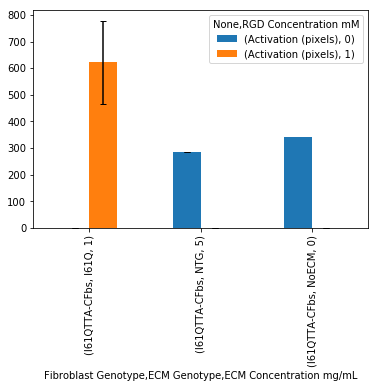

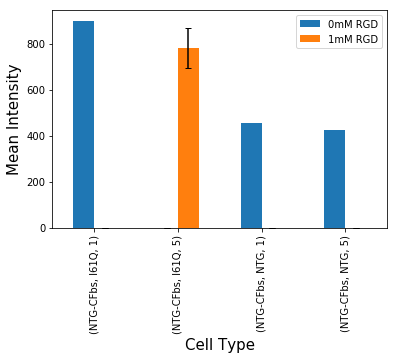

Activation (pixels)  \
RGD Concentration mM                                                       0   
Fibroblast Genotype ECM Genotype ECM Concentration mg/mL                       
I61QTTA-CFbs        I61Q         1                                  0.000000   
                    NTG          5                                286.253009   
                    NoECM        0                                343.023529   
NTG-CFbs            I61Q         1                                899.926829   
                                 5                                  0.000000   
                    NTG          1                                454.434783   
                                 5                                425.372093   

                                                                      \
RGD Concentration mM                                               1   
Fibroblast Genotype ECM Genotype ECM Concentration mg/mL               
I61QTTA-CFbs        I61Q         1                        622.263636   
                    NTG          5                          0.000000   
                    NoECM        0                          0.000000   
NTG-CFbs            I61Q         1                          0.000000   
                                 5                        781.196183   
                    NTG          1                          0.000000   
                                 5                          0.000000   

                                                         Standard Deviation  \
RGD Concentration mM                                                      0   
Fibroblast Genotype ECM Genotype ECM Concentration mg/mL                      
I61QTTA-CFbs        I61Q         1                                 0.000000   
                    NTG          5                               153.377969   
                    NoECM        0                               186.860563   
NTG-CFbs            I61Q         1                               694.757245   
                                 5                                 0.000000   
                    NTG          1                               255.661431   
                                 5                               363.536251   

                                                                       
RGD Concentration mM                                                1  
Fibroblast Genotype ECM Genotype ECM Concentration mg/mL               
I61QTTA-CFbs        I61Q         1                         495.057627  
                    NTG          5                           0.000000  
                    NoECM        0                           0.000000  
NTG-CFbs            I61Q         1                           0.000000  
                                 5                        1056.936748  
                    NTG          1                           0.000000  
                                 5                           0.000000

In [30]:
pretty = copymod.groupby(['Fibroblast Genotype','ECM Genotype','ECM Concentration mg/mL' ,'RGD Concentration mM' ]).mean().unstack(fill_value=0)
fibroblasts = pretty.groupby(['Fibroblast Genotype'])

errors = copymod.groupby(['Fibroblast Genotype', 'ECM Genotype', 'ECM Concentration mg/mL', 'RGD Concentration mM']).std().unstack(fill_value =0)

fibroblasts.plot.bar(y = ['Activation (pixels)'], yerr = errors, capsize = 3)
plt.xlabel('Cell Type', size =15)
plt.ylabel('Mean Intensity', size = 15)
plt.legend(["0mM RGD","1mM RGD"])
plt.show()
pretty

But say I just want to look at how the different fibroblast populations responded to the RGD concentrations and disregard the rest, I could group my data this way as well.

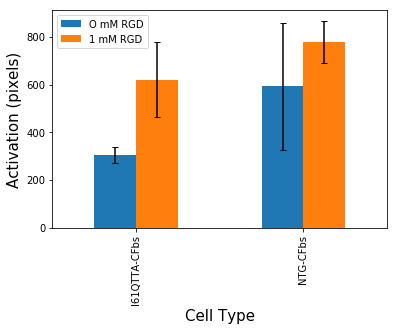

In [27]:
pretty2 = copymod.groupby(['Fibroblast Genotype','RGD Concentration mM' ]).mean().unstack(fill_value=0)
errors2 = copymod.groupby(['Fibroblast Genotype', 'RGD Concentration mM']).std().unstack(fill_value =0)
ax = pretty2.plot.bar(y = ['Activation (pixels)'], yerr = errors2, capsize = 3)
plt.xlabel('Cell Type', size =15)
plt.ylabel('Activation (pixels)', size = 15)
ax.legend(["O mM RGD", "1 mM RGD"])
plt.show()